<a href="https://colab.research.google.com/github/Skygers/Computational-High-Energy-Particle-Physics/blob/main/CMS/activity00_CMS_muons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to edit and save this notebook to your personal Google Drive

If you try to run code in this notebook, you will be unable to as you are not the owner. Instead, you should first make a copy.

To copy this notebook to your Google Drive
* Select **File** (from the menu at the top) to get the drop-down options.
* Select **Save a copy in Drive**.

This will automatically open the copy in a new tab for you to work in. This new notebook will be saved into a folder on your personal Drive called *Colab Notebooks*.

After you do this, you will be able to edit and run the notebook and save your changes.

Still stumped? Check out <a href="https://www.youtube.com/watch?v=qaJ2UpMPXKk"> this video</a> for help or the **Documentation and help** section of the Particle Physics Playground.

# Relativistic kinematics

<h3>Learning goals</h3>
<ul>
    <li>Relativistic kinematics.
    <li>Standard model particles.
</ul>

<b>Background</b>

If you know the mass of a particle, most of the time you know <i>what that particle is</i>. However, there is no way to just build a single detector that gives you the mass. You need to be clever and make use of Special relativity, specifically <a href="http://en.wikipedia.org/wiki/Relativistic_mechanics">relativistic kinematics</a>.

To determine the mass ($m$) of a particle you need to know the 4-momenta of the particles ($\mathbf{P}$) that are detected after the collision: the energy ($E$), the momentum in the x direction ($p_x$), the momentum in the y direction ($p_y$), the momentum in the z direction ($p_z$).

$$\mathbf{P} = (E,p_x,p_y,p_z)$$


\begin{equation*} m = \sqrt{E^2-(p_x^2+p_y^2 + p_z^2)} \end{equation*}


<b>Let's code!</b>

Here is some sample code that reads in data from a small sample file from the <a href = "http://cms.cern/">CMS experiment</a>. It loops over data from many different proton-proton collisions.

If you haven't already, you will want to go through the [Data Interfacing](https://colab.research.google.com/drive/1wMs8ffF8KjQhulL90_fCCVIZT5Q4e9x5) exercise so you know how to pull out the relevant information.

For each collision, you can get the 4-momenta of the jets, muons, electrons, and photons produced in these collisions.



<h2><font color="red">Challenge!</font></h2>

Copy this sample code and use it to calculate the mass of the muons. Make a histogram of this quantity.

<i>Hint!</i>

Make sure you do this for all the muons! Each collision can produce differing numbers of muons, so take care when you code this up.

In [1]:
###### This cell need only be run once per session ##############
###### Make sure your runtime type is Python 3 #########

# Import h5hep from Github. This is to allow us to read these
# particular files.
!pip install git+https://github.com/mattbellis/h5hep.git

# Import custom tools package from Github. These are some simple accessor functions
# to make it easier to work with these data files.
!pip install git+https://github.com/mattbellis/particle_physics_simplified.git

import pps_tools as pps
import h5hep

  Cloning https://github.com/mattbellis/h5hep.git to /tmp/pip-req-build-8c43xxa1
  Running command git clone --filter=blob:none --quiet https://github.com/mattbellis/h5hep.git /tmp/pip-req-build-8c43xxa1
  Resolved https://github.com/mattbellis/h5hep.git to commit d9adc7dc7f7e3a3ec60671c731bf74a5f83e4e30
  Preparing metadata (setup.py) ... done
  Created wheel for h5hep: filename=h5hep-0.9-py3-none-any.whl size=19766 sha256=0995d2e5cb74ac8275bd78a7b9e77914cc4f43bdf3f798455f6eb58b07b59082
  Stored in directory: /tmp/pip-ephem-wheel-cache-3_x0us5q/wheels/4d/9a/b1/eb2b2bdbe588e10e0e1f643393d224d1e4d70a601879a3f0a1
Successfully built h5hep
  Cloning https://github.com/mattbellis/particle_physics_simplified.git to /tmp/pip-req-build-bsxurijm
  Running command git clone --filter=blob:none --quiet https://github.com/mattbellis/particle_physics_simplified.git /tmp/pip-req-build-bsxurijm
  Resolved https://github.com/mattbellis/particle_physics_simplified.git to commit 85ec828661b39c6c08caa7625

In [2]:
###### This cell need only be run once per session ############################

# Fetch data file with 1000 collisions
pps.download_from_drive('dimuons_1000_collisions.hdf5')

# Uncomment the line below to download a larger dataset with 100,000 collisions
pps.download_from_drive('dimuons_100k.hdf5')

# You may want to test your code with the smaller file, and then when it works,
# rerun everything with the larger file.


In [3]:
#infile = 'data/dimuons_1000_collisions.hdf5'

# Uncomment the following line if you downloaded the larger file and would like to use it.
infile = 'data/dimuons_100k.hdf5'

collisions = pps.get_collisions(infile,experiment='CMS',verbose=False)


Building a simplified interface to the events...

Building the indices...
Built the indices!
Data is read in and input file is closed.
Reading in event  0
Reading in event  10000
Reading in event  20000
Reading in event  30000
Reading in event  40000
Reading in event  50000
Reading in event  60000
Reading in event  70000
Reading in event  80000
Reading in event  90000


Your histogram should look something like the following sketch, though the peak will be at different values.

The value of the peak, should be the mass of the particle <a href="http://en.wikipedia.org/wiki/Muon">Check your answer!</a>

You should also make histograms of the energy and magnitude of momentum ($|p|$). You should see a pretty wide range of values for these, and yet the mass is a very specific number.

<b>NOTE: If you are getting an error saying that there is no module "pps_tools", go to Runtime, and then select Restart runtime. Also make sure that your runtime type is Python 3.</b>

In [4]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/particle-physics-playground/playground/master/activities/images/muons_sketch.jpeg')

In [52]:
import matplotlib.pyplot as plt
import numpy as np


muon_masses = []
for collision in collisions:
  muons = collision['muons']
  for muon in muons:
    mass_squared = muon['e']**2 - (muon['px']**2 + muon['py']**2 + muon['pz']**2)
    mass = np.sqrt(mass_squared)
    muon_masses.append(mass)

<ipython-input-52-314b8ccccc62>:10: RuntimeWarning: invalid value encountered in sqrt
  mass = np.sqrt(mass_squared)
<ipython-input-52-314b8ccccc62>:10: RuntimeWarning: invalid value encountered in sqrt
  mass = np.sqrt(mass_squared)


In [61]:
x = muon['e']**2
x

39.836923189596064

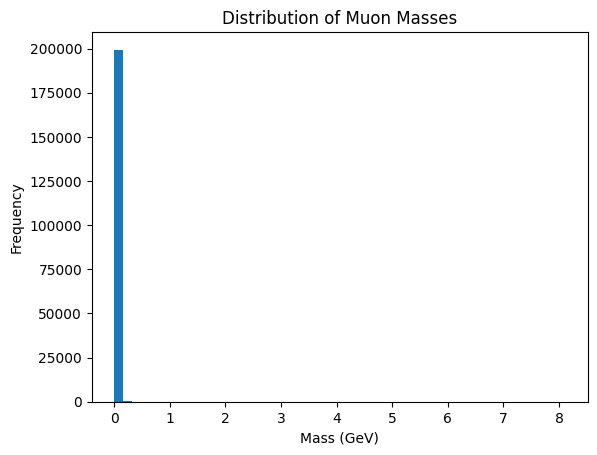

In [55]:
plt.hist(muon_masses, bins=50)
plt.xlabel('Mass (GeV)')
plt.ylabel('Frequency')
plt.title('Distribution of Muon Masses')
plt.show()

In [63]:
# Your code here
print(len(collisions), 'collisions were read in.')

muons_masses = []
for entry, collision in enumerate(collisions):
  if entry % 1000 == 0:
    print(entry)

  muons = collision['muons']
  nmuons = len(muons)

100000 collisions were read in.


Suppose we didn't know anything about special relativity and we tried calculating the mass from what we know about classical physics.

$$KE = \frac{1}{2}mv^2 \qquad KE = \frac{p^2}{2m} \qquad m = \frac{p^2}{2KE}$$

Let's interpret the energy from the CMS data as the kinetic energy ($KE$). Use classical mechanics then to calculate the mass of the muon, given the energy/KE and the momentum. What does <b>that</b> histogram look like?

*Your histogram should not look like the last one! We know that the Classical description of kinematics is not accurate for particle moving at high energies, so don't worry if the two histograms are different. That's the point!  :)*

In [ ]:
# Your code here